In [1]:
import pandas as pd
import os
print(os.getcwd())

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing / NLP
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

/Users/jasminebrunson/Downloads


In [2]:
df = pd.read_csv("exploitdb_full.csv")

In [3]:
df

,id,vendorId,type,bulletinFamily,title,description,published,modified,cve,cvss_score,...,reporter,references,lastseen,viewCount,enchant_score,enchant_uncertainty,enchant_vector,enchant_short_description,enchant_tags,sourceHref
0,EDB-ID:1,NaN,exploitdb,exploit,Microsoft IIS - WebDAV &#039;ntdll.dll&#039; R...,NaN,2003-03-23T00:00:00,2003-03-23T00:00:00,CVE-2003-0109,0.0,...,kralor,NaN,2025-01-21T21:12:18,204,7.4,1.9,NONE,Exploit for ntdll.dll using WebDAV for remote ...,ntdll.dll exploit \nwebdav \nremote shell \...,https://www.exploit-db.com/raw/1
1,EDB-ID:2,NaN,exploitdb,exploit,Microsoft IIS 5.0 - WebDAV Remote,NaN,2003-03-24T00:00:00,2003-03-24T00:00:00,CVE-2003-0109,7.5,...,RoMaNSoFt,NaN,2025-01-21T21:12:18,124,6.4,2.5,NONE,Exploiting IIS 5.0 WebDAV vulnerability throug...,"iis 5.0 vulnerability, webdav exploit, ntdll.d...",https://www.exploit-db.com/raw/2
2,EDB-ID:3,NaN,exploitdb,exploit,Linux Kernel 2.2.x/2.4.x (RedHat) - &#039;ptra...,NaN,2003-03-30T00:00:00,2003-03-30T00:00:00,CVE-2003-0127,0.0,...,Wojciech Purczynski,NaN,2025-01-21T21:12:18,192,7.4,1.9,NONE,Local privilege escalation vulnerability in Li...,"linux kernel, local privilege escalation, ptra...",https://www.exploit-db.com/raw/3
3,EDB-ID:4,NaN,exploitdb,exploit,Sun SUNWlldap Library Hostname - Local Buffer ...,NaN,2003-04-01T00:00:00,2003-04-01T00:00:00,NaN,0.0,...,Andi,NaN,2025-01-21T21:12:18,61,7.4,1.9,NONE,Local buffer overflow vulnerability exploit co...,"local buffer overflow, solaris systems, sun ld...",https://www.exploit-db.com/raw/4
4,EDB-ID:5,NaN,exploitdb,exploit,Microsoft Windows 2000/NT 4 - RPC Locator Serv...,NaN,2003-04-03T00:00:00,2003-04-03T00:00:00,CVE-2003-0003,0.0,...,Marcin Wolak,NaN,2025-01-21T21:12:18,178,7.4,1.9,NONE,Exploiting Microsoft RPC Locator Service buffe...,"microsoft windows 2000, rpc locator service, r...",https://www.exploit-db.com/raw/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47362,EDB-ID:52078,NaN,exploitdb,exploit,NoteMark &lt; 0.13.0 - Stored XSS,NaN,2024-08-28T00:00:00,2024-08-28T00:00:00,CVE-2024-41819,8.7,...,Alessio Romano (sfoffo),NaN,2025-01-16T05:33:56,80,7.4,1.9,NONE,Stored XSS in NoteMark version 0.13.0 and belo,"notemark, stored xss, exploit, alessio romano,...",https://www.exploit-db.com/raw/52078
47363,EDB-ID:52079,NaN,exploitdb,exploit,dizqueTV 1.5.3 - Remote Code Execution (RCE),NaN,2024-10-01T00:00:00,2024-10-01T00:00:00,NaN,0.0,...,Ahmed Said Saud Al-Busaidi,NaN,2024-10-01T17:29:39,168,7.4,1.9,NONE,dizqueTV 1.5.3 Remote Code Execution (RCE) - V...,"dizquetv 1.5.3, remote code execution, unautho...",https://www.exploit-db.com/raw/52079
47364,EDB-ID:52081,NaN,exploitdb,exploit,reNgine 2.2.0 - Command Injection (Authenticated),NaN,2024-10-01T00:00:00,2024-10-01T00:00:00,NaN,0.0,...,Caner Tercan,NaN,2024-10-01T17:29:39,178,7.4,1.9,NONE,reNgine 2.2.0 - Command Injection (Authenticat...,"rengine, command injection, authenticated, mac...",https://www.exploit-db.com/raw/52081
47365,EDB-ID:52080,NaN,exploitdb,exploit,openSIS 9.1 - SQLi (Authenticated),NaN,2024-10-01T00:00:00,2024-10-01T00:00:00,NaN,0.0,...,Devrim Dıragumandan,NaN,2024-10-01T17:29:39,203,7.4,1.9,NONE,"openSIS 9.1 SQL injection via ""X-Forwarded-For...","sql injection, opensis 9.1, x-forwarded-for, p...",https://www.exploit-db.com/raw/52080


In [4]:
df.describe()

,vendorId,cvss_score,references,viewCount,enchant_score,enchant_uncertainty
count,0.0,47367.000000,0.0,47367.000000,47367.000000,46117.000000
mean,NaN,0.999217,NaN,80.677687,7.326039,1.772604
std,NaN,2.696302,NaN,558.071202,0.915913,0.483971
min,NaN,0.000000,NaN,8.000000,0.000000,0.000000
25%,NaN,0.000000,NaN,20.000000,7.400000,1.900000
50%,NaN,0.000000,NaN,28.000000,7.400000,1.900000
75%,NaN,0.000000,NaN,42.000000,7.400000,1.900000
max,NaN,10.000000,NaN,62180.000000,10.000000,5.400000


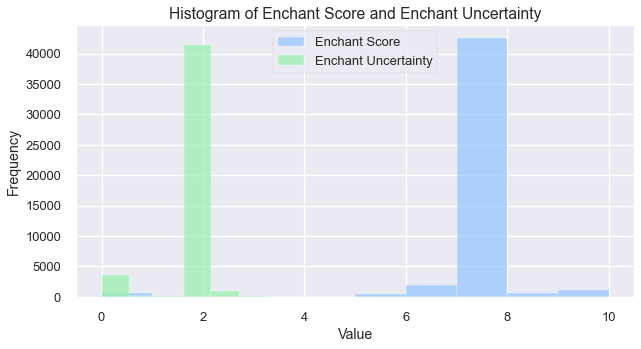

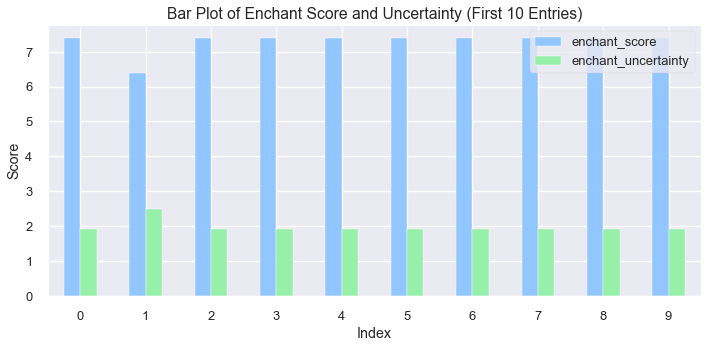

In [20]:
plt.style.use('seaborn-pastel')

# histogram for enchant_score and enchant_uncertainty
plt.figure(figsize=(10, 5))
plt.hist(df['enchant_score'], bins=10, alpha=0.7, label='Enchant Score')
plt.hist(df['enchant_uncertainty'], bins=10, alpha=0.7, label='Enchant Uncertainty')
plt.title('Histogram of Enchant Score and Enchant Uncertainty')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# bar plot for enchant_score and enchant_uncertainty (first 10 rows)
df_subset = df[['enchant_score', 'enchant_uncertainty']].head(10)

# bar plot with two metrics
df_subset.plot(kind='bar', figsize=(10, 5))
plt.title('Bar Plot of Enchant Score and Uncertainty (First 10 Entries)')
plt.xlabel('Index')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()

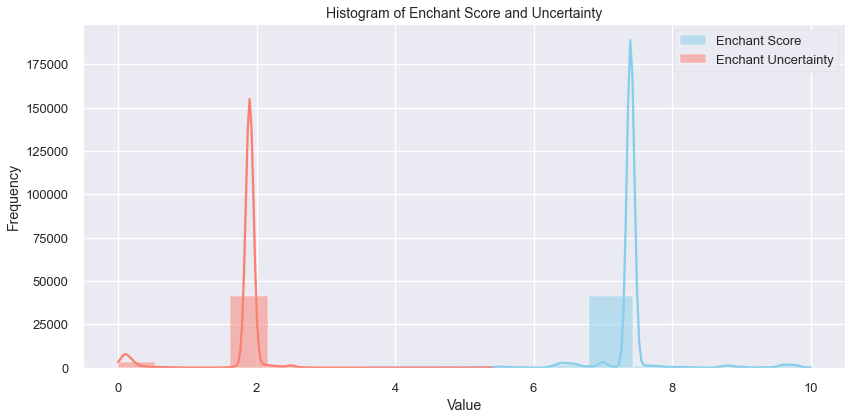

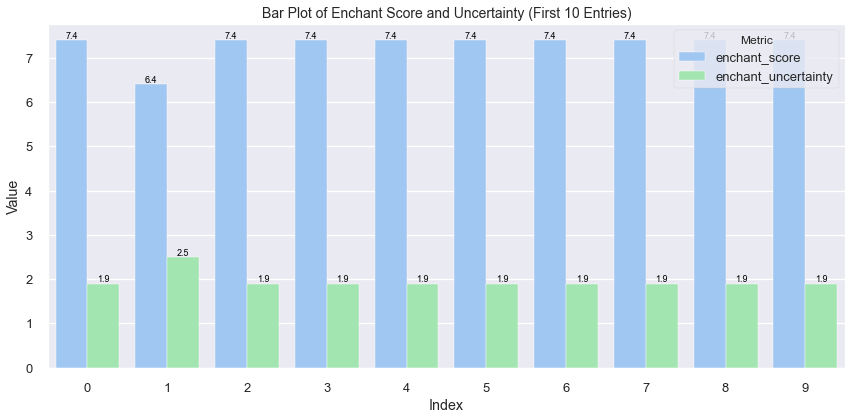

In [21]:
plt.style.use('seaborn-pastel')
#sns.set(style="darkgrid")

# drop NaN rows to clean dataset
df_clean = df[['enchant_score', 'enchant_uncertainty']].dropna()

# ----------------------------
# Histogram with Seaborn
# ----------------------------
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['enchant_score'], color='skyblue', label='Enchant Score', kde=True, bins=10)
sns.histplot(df_clean['enchant_uncertainty'], color='salmon', label='Enchant Uncertainty', kde=True, bins=10)
plt.title('Histogram of Enchant Score and Uncertainty', fontsize=14)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# Bar Plot for First 10 Entries
# ----------------------------
df_bar = df_clean.head(10).copy()
df_bar.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=df_bar.melt(id_vars='index', 
                                        value_vars=['enchant_score', 'enchant_uncertainty']),
                       x='index', y='value', hue='variable')

# annotations
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom',
                      fontsize=9, color='black')

plt.title('Bar Plot of Enchant Score and Uncertainty (First 10 Entries)', fontsize=14)
plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

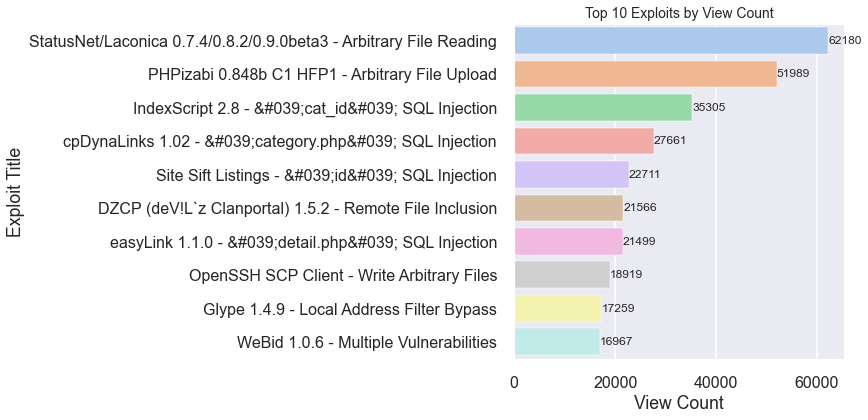

In [26]:
plt.style.use('seaborn-pastel')
#plt.style.use('seaborn-poster')
df_top_views = df[['viewCount', 'title']].dropna().sort_values(by='viewCount', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=df_top_views, x='viewCount', y='title', palette='pastel')

for p in bar_plot.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height() / 2, f'{int(width)}', va='center')

plt.title('Top 10 Exploits by View Count', fontsize=14)
plt.xlabel('View Count')
plt.ylabel('Exploit Title')
plt.tight_layout()
plt.show()

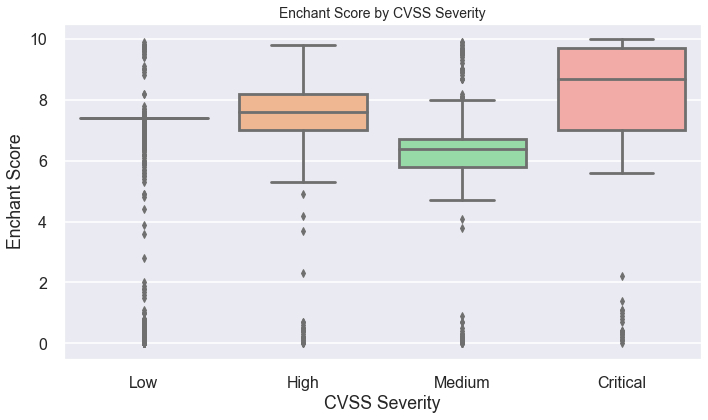

In [8]:
plt.style.use('seaborn-pastel')
# Create CVSS category
def classify_cvss(score):
    if pd.isna(score):
        return 'Unknown'
    elif score < 4.0:
        return 'Low'
    elif score < 7.0:
        return 'Medium'
    elif score < 9.0:
        return 'High'
    else:
        return 'Critical'

df['cvss_category'] = df['cvss_score'].apply(classify_cvss)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cvss_category', y='enchant_score', palette='pastel')
plt.title('Enchant Score by CVSS Severity', fontsize=14)
plt.xlabel('CVSS Severity')
plt.ylabel('Enchant Score')
plt.tight_layout()
plt.show()

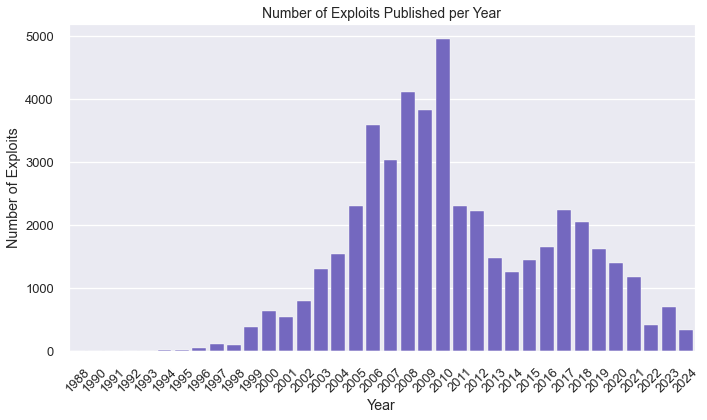

In [39]:
#plt.style.use('seaborn-talk')
# convert published date to datetime and extract year
df['published'] = pd.to_datetime(df['published'], errors='coerce')
df['year'] = df['published'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', color='slateblue')
plt.title('Number of Exploits Published per Year', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Exploits')
plt.tight_layout()
plt.show()

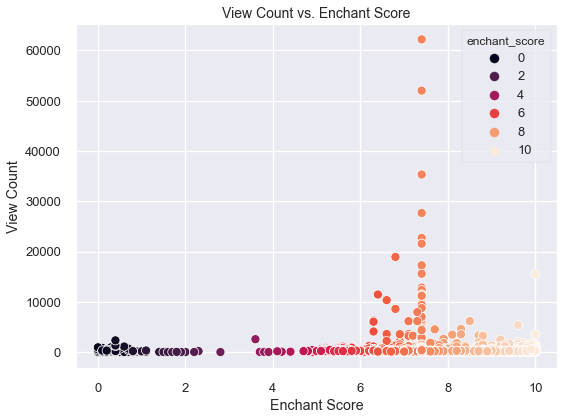

In [44]:
df_scatter = df[['enchant_score', 'viewCount']].dropna()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scatter, x='enchant_score', y='viewCount', hue='enchant_score', palette='rocket')
plt.title('View Count vs. Enchant Score', fontsize=14)
plt.xlabel('Enchant Score')
plt.ylabel('View Count')
plt.tight_layout()
plt.show()

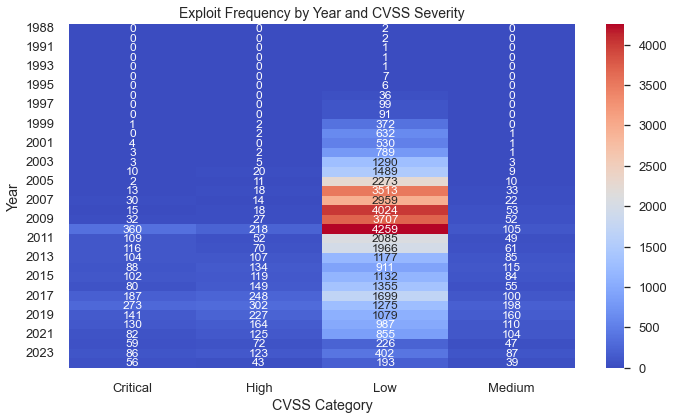

In [48]:
plt.style.use('seaborn-talk')
heat_df = df.groupby(['year', 'cvss_category']).size().unstack(fill_value=0)


plt.figure(figsize=(10, 6))
sns.heatmap(heat_df, annot=True, fmt='d', cmap='coolwarm')
plt.title('Exploit Frequency by Year and CVSS Severity', fontsize=14)
plt.xlabel('CVSS Category')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

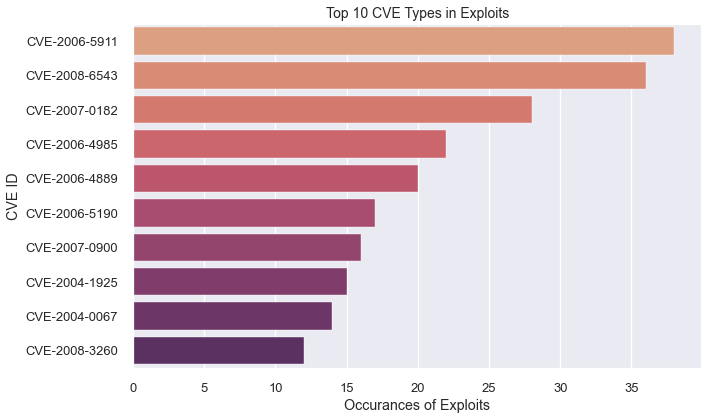

In [49]:
top_cve = df['cve'].dropna().value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cve.values, y=top_cve.index, palette='flare')
plt.title('Top 10 CVE Types in Exploits', fontsize=14)
plt.xlabel('Occurances of Exploits')
plt.ylabel('CVE ID')
plt.tight_layout()
plt.show()

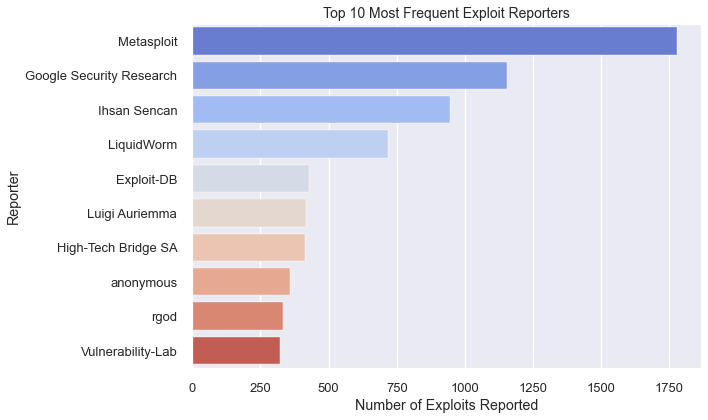

In [51]:
df_reporters = df['reporter'].dropna()
df_reporters = df_reporters[df_reporters.str.strip() != '']

# top 10 reporters
top_reporters = df_reporters.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_reporters.values, y=top_reporters.index, palette='coolwarm')
plt.title('Top 10 Most Frequent Exploit Reporters', fontsize=14)
plt.xlabel('Number of Exploits Reported')
plt.ylabel('Reporter')
plt.tight_layout()
plt.show()

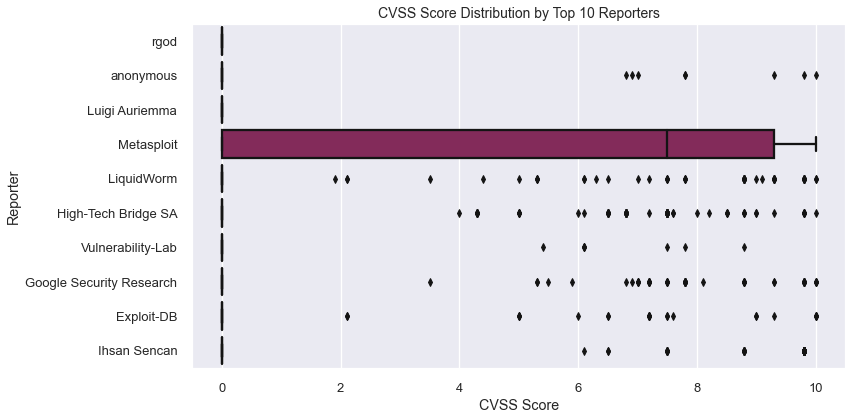

In [53]:
df_filtered = df[['reporter', 'cvss_score']].dropna()
df_filtered = df_filtered[df_filtered['reporter'].str.strip() != '']

# select top 10 reporters by frequency
top_reporters = df_filtered['reporter'].value_counts().head(10).index
df_top = df_filtered[df_filtered['reporter'].isin(top_reporters)]


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='cvss_score', y='reporter', palette='rocket')
plt.title('CVSS Score Distribution by Top 10 Reporters', fontsize=14)
plt.xlabel('CVSS Score')
plt.ylabel('Reporter')
plt.tight_layout()
plt.show()

In [15]:
df["enchant_vector"].value_counts()

NONE    47367
Name: enchant_vector, dtype: int64

In [16]:
df["viewCount"].nunique()

1043

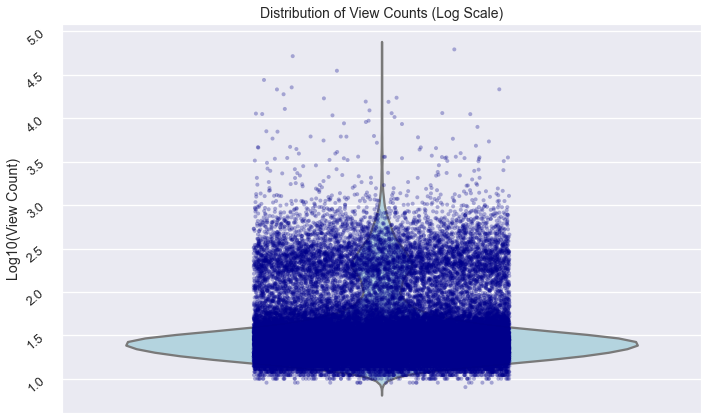

In [56]:
df_view = df[['viewCount']].dropna()
df_view = df_view[df_view['viewCount'] > 0]  # avoid log(0) = undefined

# add log-transformed viewCount
df_view['log_viewCount'] = np.log10(df_view['viewCount'])

plt.figure(figsize=(10, 6))

# violin plot for distribution shape
sns.violinplot(y='log_viewCount', data=df_view, inner=None, color='lightblue')

# overlay actual data points
sns.stripplot(y='log_viewCount', data=df_view, color='darkblue', size=4, alpha=0.3, jitter=0.2)

plt.title('Distribution of View Counts (Log Scale)', fontsize=14)
plt.ylabel('Log10(View Count)')
plt.xlabel('')
plt.yticks(rotation=400)
plt.tight_layout()
plt.show()

Most exploits in the dataset receive between 30 and 150 views. A majority of entries are moderately viewed.